In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="white")

import numpy as np
import pandas as pd
import scipy.io as sio

In [2]:
mat = sio.loadmat('./data/ex8data1.mat')
mat.keys()

dict_keys(['__header__', '__globals__', 'Xval', '__version__', 'X', 'yval'])

In [3]:
X = mat.get('X')
print(X.shape)
X[:10]

(307, 2)


array([[ 13.04681517,  14.74115241],
       [ 13.40852019,  13.7632696 ],
       [ 14.19591481,  15.85318113],
       [ 14.91470077,  16.17425987],
       [ 13.57669961,  14.04284944],
       [ 13.92240251,  13.40646894],
       [ 12.82213164,  14.22318782],
       [ 15.67636615,  15.89169137],
       [ 16.16287532,  16.20299807],
       [ 12.66645095,  14.89908374]])

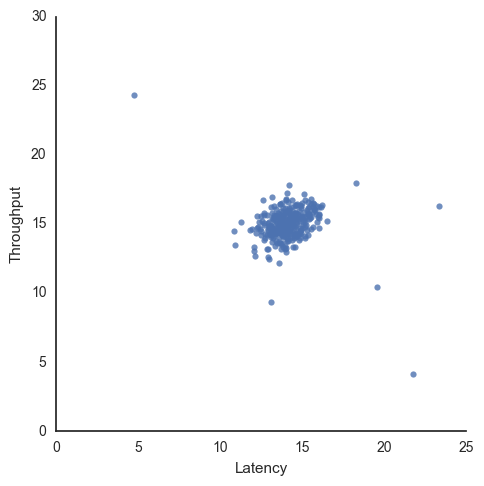

In [4]:
sns.lmplot('Latency', 'Throughput',
           data=pd.DataFrame(X, columns=['Latency', 'Throughput']), 
           fit_reg=False)